<a href="https://colab.research.google.com/github/Felipeosouz/Formacao-Cientista-de-Dados/blob/main/Machine%20Learning/Neural%20Networks%20e%20Deep%20Learning/Soybean_RedeNeural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

base = pd.read_csv("soybean.csv")
base.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [3]:
X = base.iloc[:, 0:35].values
y = base.iloc[:, 35].values

labelencoder = LabelEncoder()

for x in range(35):
  X[:, x] = labelencoder.fit_transform(X[:, x])
y[:] = labelencoder.fit_transform(y[:])
X

array([[6, 2, 1, ..., 2, 1, 2],
       [2, 2, 1, ..., 2, 1, 2],
       [3, 2, 1, ..., 2, 1, 2],
       ...,
       [4, 1, 0, ..., 0, 0, 3],
       [1, 1, 0, ..., 0, 0, 3],
       [4, 1, 0, ..., 0, 0, 3]], dtype=object)

In [4]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size = 0.3, random_state = 0)

X_treino = X_treino.astype("float32")
X_teste = X_teste.astype("float32")

y_treino = np_utils.to_categorical(y_treino, 19)
y_teste = np_utils.to_categorical(y_teste, 19)

modelo = Sequential()
modelo.add(Dense(units = 166, input_dim = 35))
modelo.add(Dense(units = 166))
modelo.add(Dense(units = 19, activation = "softmax"))
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 166)               5976      
                                                                 
 dense_1 (Dense)             (None, 166)               27722     
                                                                 
 dense_2 (Dense)             (None, 19)                3173      
                                                                 
Total params: 36,871
Trainable params: 36,871
Non-trainable params: 0
_________________________________________________________________


In [5]:
modelo.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
modelo.fit(X_treino, y_treino, epochs = 200, validation_data = (X_teste, y_teste))

Epoch 1/200
7/7 [==============================] - 1s 44ms/step - loss: 2.8841 - accuracy: 0.2010 - val_loss: 2.6365 - val_accuracy: 0.2234
Epoch 2/200
7/7 [==============================] - 0s 14ms/step - loss: 2.2575 - accuracy: 0.3137 - val_loss: 2.0519 - val_accuracy: 0.3820
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 1.7877 - accuracy: 0.4363 - val_loss: 1.8472 - val_accuracy: 0.5157
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 1.4950 - accuracy: 0.5637 - val_loss: 1.5987 - val_accuracy: 0.5511
Epoch 5/200
7/7 [==============================] - 0s 17ms/step - loss: 1.2950 - accuracy: 0.5882 - val_loss: 1.4743 - val_accuracy: 0.5866
Epoch 6/200
7/7 [==============================] - 0s 18ms/step - loss: 1.1336 - accuracy: 0.6667 - val_loss: 1.3680 - val_accuracy: 0.5846
Epoch 7/200
7/7 [==============================] - 0s 17ms/step - loss: 0.9956 - accuracy: 0.7059 - val_loss: 1.3012 - val_accuracy: 0.5804
Epoch 8/200
7/7 [===

In [6]:
previsoes = modelo.predict(X_teste)
previsoes = (previsoes > 0.5)
previsoes[0]

15/15 [==============================] - 0s 2ms/step


array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

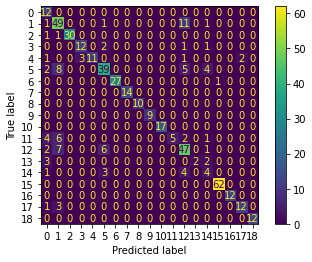

In [7]:
previsoes_matrix = [np.argmax(t) for t in previsoes]
y_matrix = [np.argmax(t) for t in y_teste]

confusao = confusion_matrix(y_matrix, previsoes_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix = confusao)
disp.plot()

In [8]:
taxa_acerto = accuracy_score(y_matrix, previsoes_matrix)
taxa_acerto

0.8058455114822547